# Develop pyfrenet with splines

In [131]:
import numpy as np
import matplotlib.pyplot as plt

## Splines from waypoints

In [132]:
waypoints = [
    (-1, 1),
    (0, 0),
    (1, 0),
    (2, 2),
    (3, 3),
    (2, 4)
]

In [133]:
waypoints_arr = np.array(waypoints)

In [134]:
len(waypoints_arr)

6

In [135]:
waypoints_x = waypoints_arr[:, 0]
waypoints_y = waypoints_arr[:, 1]

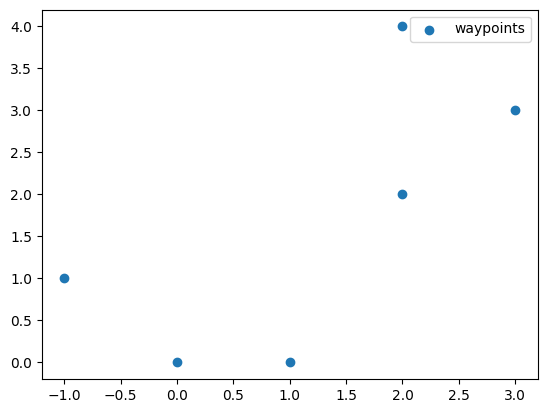

In [136]:
plt.scatter(waypoints_x, waypoints_y, marker="o", label="waypoints")
plt.legend()

In [137]:
from scipy.interpolate import CubicSpline

In [138]:
spline_x = CubicSpline(np.arange(len(waypoints)), waypoints_x)
spline_y = CubicSpline(np.arange(len(waypoints)), waypoints_y)

The parameter of the curve is $u$:

In [139]:
u_arr = np.arange(0, len(waypoints)-1, 0.01)

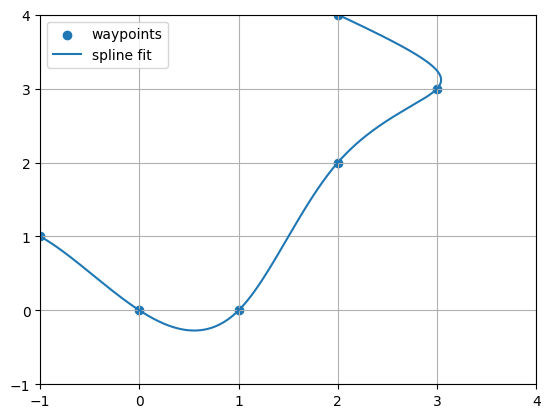

In [140]:
plt.scatter(waypoints_x, waypoints_y, marker="o", label="waypoints")
plt.plot(spline_x(u_arr), spline_y(u_arr), label="spline fit")
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid()

## Arc length

$$
s (u)= \int^{u}_{0} f(u)  = \int^{u}_{0}\sqrt{\left(\dfrac{d x(t)}{dt}\right)^2+\left(\dfrac{y(t)}{dt}\right)^2}\,dt
$$


In [141]:
spline_dx_du = spline_x.derivative(1)
spline_dy_du = spline_y.derivative(1)

In [142]:
def func_to_integrate(u: float):
    return np.sqrt(spline_dx_du(u)**2 + spline_dy_du(u)**2)

In [143]:
from scipy.integrate import quad

In [146]:
def arclength(u: float) -> float:
    return quad(func_to_integrate, 0, u)[0]

arclength(3)

4.8287247744248525

## Express the spline wrt arc length

In [186]:
u_arr = np.arange(0, len(waypoints)-1, 0.001)

s_arr = list()

for s in u_arr:
    s_u = arclength(s)
    s_arr.append(s_u)

Text(0.5, 1.0, 'arc-length $s$ vs parameter $u$')

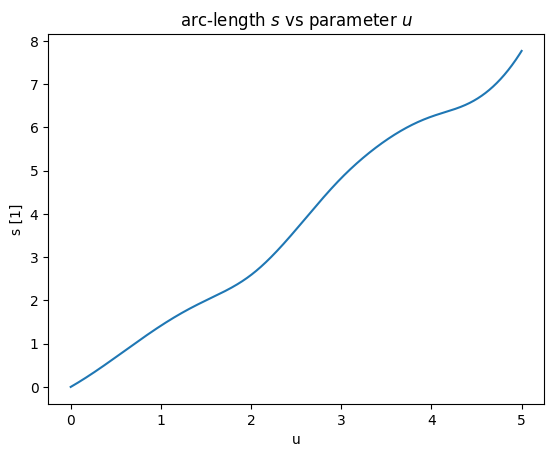

In [203]:
plt.plot(u_arr, s_arr)
plt.xlabel("u")
plt.ylabel("s [1]")
plt.title("arc-length $s$ vs parameter $u$")

In [204]:
# fit splines wrt arc length s
spline_x_approx = CubicSpline(s_arr, spline_x(u_arr))
spline_y_approx = CubicSpline(s_arr, spline_y(u_arr))

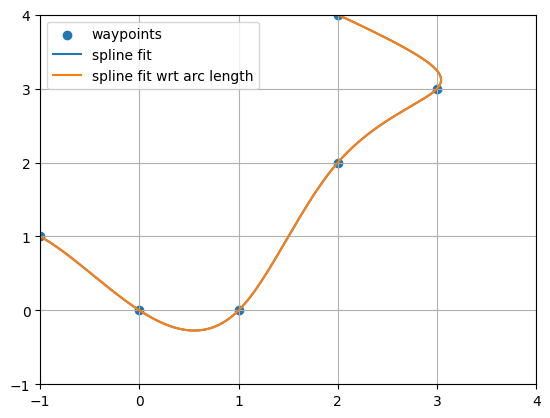

In [189]:
plt.scatter(waypoints_x, waypoints_y, marker="o", label="waypoints")
plt.plot(spline_x(u_arr), spline_y(u_arr), label="spline fit")
plt.plot(spline_x_approx(s_arr), spline_y_approx(s_arr), label="spline fit wrt arc length")
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid()

## Derivatives

In [190]:
spline_dx_approx_ds = spline_x_approx.derivative(1)
spline_dy_approx_ds = spline_y_approx.derivative(1)

spline_ddx_approx_ds2 = spline_x_approx.derivative(2)
spline_ddy_approx_ds2 = spline_y_approx.derivative(2)

## Tangential vector

In [191]:
def tangential_vector(u: float) -> np.ndarray:
    return np.r_[spline_dx_approx_ds(u), spline_dy_approx_ds(u)]

tangential_vector(1.0)

array([ 0.68508268, -0.72846532])

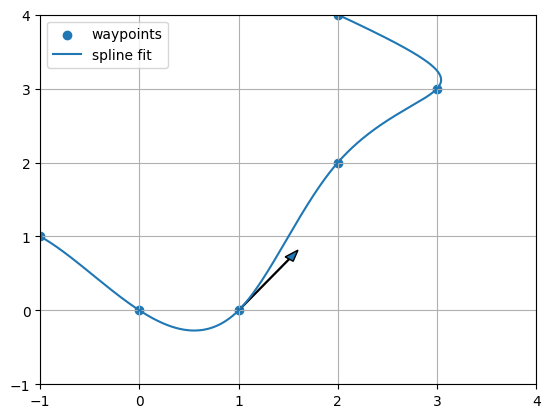

In [192]:
plt.scatter(waypoints_x, waypoints_y, marker="o", label="waypoints")
plt.plot(spline_x(u_arr), spline_y(u_arr), label="spline fit")
# plt.plot(spline_x_approx(s_arr), spline_y_approx(s_arr), label="spline fit wrt arc length")
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid()

s = 2.6

tangential_vec = tangential_vector(s)

plt.arrow(spline_x_approx(s), spline_y_approx(s), tangential_vec[0], tangential_vec[1], width=0.01, length_includes_head=True, head_width=0.1)

## Normal vector

In [193]:
# # look at the splines and their derivatives

# fig, axs  = plt.subplots(nrows=3, figsize=(9, 9), sharex=True)

# (ax, axd1, axd2) = axs
# ax.plot(u_arr, spline_x(s_arr))
# ax.plot(u_arr, spline_y(s_arr))

# axd1.plot(u_arr, spline_dx_du(u_arr))
# axd1.plot(u_arr, spline_dy_du(u_arr))

# axd2.plot(u_arr, spline_ddx_du2(u_arr), label="x")
# axd2.plot(u_arr, spline_ddy_du2(u_arr), label="y")


# for ax in axs:
#     ax.grid()
#     ax.legend()


In [194]:
def curvature(s: float) -> float:
    return np.sqrt(spline_ddx_approx_ds2(s)**2 + spline_ddy_approx_ds2(s)**2)

In [195]:
1/curvature(3.0)

4.774411771980511

In [196]:
# normal_vector(3)

In [197]:
def normal_vector(s: float) -> np.ndarray:
    curv = curvature(s)
    return 1/curv * np.r_[spline_ddx_approx_ds2(s), spline_ddy_approx_ds2(s)]

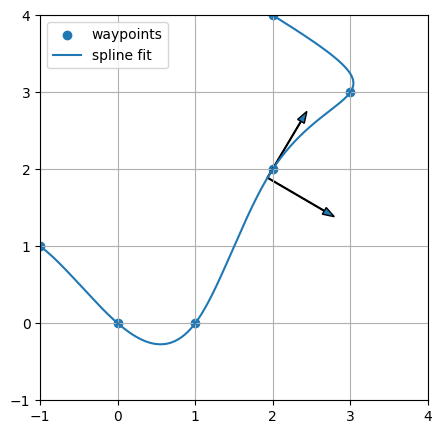

In [198]:
plt.figure(figsize=(5,5))
plt.scatter(waypoints_x, waypoints_y, marker="o", label="waypoints")
plt.plot(spline_x(u_arr), spline_y(u_arr), label="spline fit")
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid()

s = 4.7

tangential_vec = tangential_vector(s)
normal_vec = normal_vector(s)

plt.arrow(spline_x_approx(s), spline_y_approx(s), tangential_vec[0], tangential_vec[1], width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(spline_x_approx(s), spline_y_approx(s), normal_vec[0], normal_vec[1], width=0.01, length_includes_head=True, head_width=0.1)

In [218]:
np.dot(tangential_vector(3.5), normal_vector(3.5))

-0.08657922938523196

## Frenet 2 Cartesian

In [223]:
def point_from_arclength(s: float) -> tuple[float, float]:
    return spline_x_approx(s), spline_y_approx(s)

In [224]:
def frenet2cart(s: float, t: float) -> tuple[float, float]:
    pt = np.array(point_from_arclength(s))
    normal_vec = normal_vector(s)
    return pt + t*normal_vec

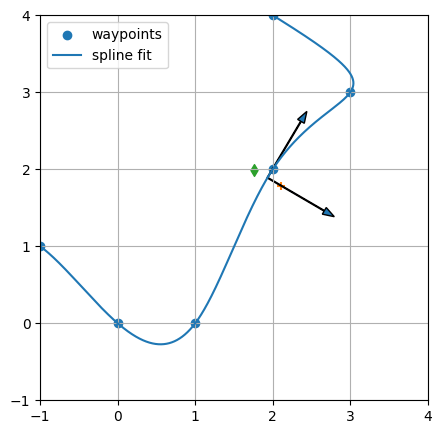

In [228]:
plt.figure(figsize=(5,5))
plt.scatter(waypoints_x, waypoints_y, marker="o", label="waypoints")
plt.plot(spline_x(u_arr), spline_y(u_arr), label="spline fit")
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid()

s = 4.7

tangential_vec = tangential_vector(s)
normal_vec = normal_vector(s)

t = 0.2
cart = frenet2cart(s, t)
plt.scatter(cart[0], cart[1], marker="+")
cart = frenet2cart(s, -t)
plt.scatter(cart[0], cart[1], marker="d")

plt.arrow(spline_x_approx(s), spline_y_approx(s), tangential_vec[0], tangential_vec[1], width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(spline_x_approx(s), spline_y_approx(s), normal_vec[0], normal_vec[1], width=0.01, length_includes_head=True, head_width=0.1)

In [234]:
frenet2cart(4.7, 1.0)

array([2.7946124 , 1.38414277])

## Cartesian 2 Frenet

In [232]:
def distance_function(s: float, xq: float, yq: float) -> float:
    return np.linalg.norm(np.r_[xq, yq] - point_from_arclength(s))

In [236]:
from scipy.optimize import minimize_scalar

In [244]:
query_point = (2, 1)
opt_result = minimize_scalar(distance_function, args=query_point)

In [245]:
opt_result

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.4560154985784408
       x: 3.911786899347866
     nit: 9
    nfev: 14

In [246]:
s_query = opt_result.x
s_query

3.911786899347866

In [247]:
t_query = np.linalg.norm(np.array(query_point) - point_from_arclength(s_query))
t_query

0.4560154985784408

In [248]:
frenet2cart(s_query, t_query)

array([1.99912888, 0.99804281])